## **Phase 2**

## **Importing Relevant Modules and Libraries**

In [58]:
import os
import cv2
import numpy as np
import dlib
from imutils import face_utils
import zipfile
import matplotlib.pyplot as plt

# Extract zip file
zip_file_name = '/content/ck.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_dataset')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Quantitative Analysis of Stress Features**

In [ ]:
# Initialize dlib's face detector and the facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def detect_lip_to_nose_distance(shape):
    # Lip to Nose distance is represented by the vertical distance between center of the mose to till the upper lip
    nose= shape[33:34]
    lip_mid= shape[51:52]
    distance = lip_mid[0][1]-nose[0][1]

    return distance

def detect_furrowed_brows(shape):
    # Furrowed brows are represented by the horizontal distance between the eyebrows
    left_brow_end = shape[21:22]
    right_brow_start = shape[22:23]
    furrowed_brows = abs(right_brow_start[0][0]  - left_brow_end[0][0])
    return furrowed_brows


def detect_nostril_flaring(shape):
    # Nostril flaring can be detected by the horizontal distance between the nostrils
    left_nostril = shape[31:32]
    right_nostril = shape[35:36]
    nostril_flaring = abs(left_nostril[0][0] - right_nostril[0][0])
    return nostril_flaring

def detect_clenched_jaw(shape):
    # Clenched jaw can be detected by the horizontal distance between the left outer boundary to right outer boundary
    jaw_start = shape[3:4]
    jaw_end = shape[13:14]
    clenched_jaw = abs(jaw_start[0][0]- jaw_end[0][0])
    return clenched_jaw

def detect_parted_mouth_distance(shape):
    # Parted Mouth Distance is the vertical distance between the upper and lower lip
    first_up = shape[50:51]
    first_down = shape[58:59]
    sec_up = shape[51:52]
    sec_down = shape[57:58]
    third_up = shape[52:53]
    third_down= shape[56:57]
    total_distance = (first_down[0][1]-first_up[0][1]) +(sec_down[0][1]-sec_up[0][1])+ (third_down[0][1]-third_up[0][1])
    return total_distance

def detect_eye_to_eyebrow_distance(shape):
    # Eye to Eyebrow is the vertical distance between the right side of left eyebrow to eyelid
    eye_mid = shape[38:39]
    eyebrow_mid = shape[20:21]
    eyebrow_distance = abs(eyebrow_mid[0][1]-  eye_mid[0][1])
    return eyebrow_distance



In [ ]:
#Extract the zip file
zip_file_name = '/content/Furrow.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_furrow')

## **Calculating Threshold for Furrowed Eyebrows**

In [ ]:
extract_path = '/content/extracted_furrow'
# Store furrowed brows distances for each image
furrow_distances = []
# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image
        image = cv2.imread(filepath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))
        # Detect faces in the image
        faces = detector(image_resized ,1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate furrowed brows distance
            furrow_distance = detect_furrowed_brows(shape)
            furrow_distances.append(furrow_distance)

# Convert furrowed brows distances to numpy array
furrow_distances_np = np.array(furrow_distances)

# Calculate average furrowed brows distance
average_furrow_distance = np.mean(furrow_distances_np)

print(f"Average furrowed brows distance across all images: {average_furrow_distance:.4f}")

Average furrowed brows distance across all images: 3.0000


##**Calculating Threshold for Eye to Eyebrow Distance**

In [ ]:
extract_path = '/content/extracted_furrow'
# Store eye to eyebrow distances for each image
eye_to_eyebrow_distances = []
# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image
        image = cv2.imread(filepath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))
        # Detect faces in the image
        faces = detector(image_resized ,1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate brows to eyes distance
            eye_to_eyebrow_distance = detect_eye_to_eyebrow_distance(shape)
            eye_to_eyebrow_distances.append(eye_to_eyebrow_distance)

# Calculate brows to eyes distance to numpy array
eyebrow_distances_np = np.array(eye_to_eyebrow_distances)

# Calculate Average brows to eyes distance
eyebrow_distance_Avg = np.mean(eyebrow_distances_np)

print(f"Average distance from brows to eyes across all images: {eyebrow_distance_Avg :.4f}")

Average distance from brows to eyes across all images: 2.0000


## **Calculating Threshold for Lip to Nose Distance**

In [ ]:
extract_path = '/content/extracted_furrow'
# Store Lip to Nose distances for each image
Lip_to_nose_distances = []
# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image
        image = cv2.imread(filepath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))
        # Detect faces in the image
        faces = detector(image_resized ,1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate Lip to nose distance
            Lip_to_nose_distance = detect_lip_to_nose_distance(shape)
            Lip_to_nose_distances.append(Lip_to_nose_distance)

#Calculate Lip to nose distance to numpy array
Lip_to_nose_distances_np = np.array(Lip_to_nose_distances)

#Calculate Average Lip to nose distances distance
Lip_to_nose_distances_Avg = np.mean(Lip_to_nose_distances_np)

print(f"Average Lip to Nose Distance across all images: {Lip_to_nose_distances_Avg :.4f}")

Average Lip to Nose Distance across all images: 4.0000


In [ ]:
#Extract the zip file
zip_file_name = '/content/nostrils.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_nostrils')

## **Calculating Threshold for Flared Nostrils**

In [ ]:
extract_path = '/content/extracted_nostrils/nostrils'

# Store nostrils distances for each image
nostrils_distances = []

# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image in grayscale mode
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))

        # Detect faces in the image
        faces = detector(image_resized, 1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate nostril flaring distance
            nostril_distance = detect_nostril_flaring(shape)
            nostrils_distances.append(nostril_distance)

# Convert nostril distances to numpy array
nostril_distances_np = np.array(nostrils_distances)

# Average nostril distance
average_nostril_distance = np.mean(nostril_distances_np)
print(f"Average nostril distance across all images: {average_nostril_distance:.4f}")


Average nostril distance across all images: 8.0000


In [ ]:
#Extract the zip file
zip_file_name = '/content/jaw.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_jaw')

## **Calculating Threshold for Clenched Jaw**

In [ ]:

extract_path = '/content/extracted_jaw/jaw'

# Store Jaw distance for each image
jaw_distances = []

# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image in grayscale mode
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))

        # Detect faces in the image
        faces = detector(image_resized, 1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate jaw clenching distance
            jaw_distance = detect_clenched_jaw(shape)
            jaw_distances.append(jaw_distance)

# Convert jaw distances to numpy array
jaw_distances_np = np.array(jaw_distances)

# Average Jaw Distances
jaw_distance_avg = np.mean(jaw_distances_np)
print(f"Average jaw clenching across all images: {jaw_distance_avg:.4f}")


Average jaw clenching across all images: 34.0000


## **Calculating Threshold for Parted Lips Distance**

In [ ]:
extract_path = '/content/extracted_jaw/jaw'

# Store parted lip distances for each image
parted_mouth_distances = []

# Extract and process features through facial landmarks for each image
for filename in os.listdir(extract_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(extract_path, filename)

        # Read the image in grayscale mode
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        # Resize image to 48x48 pixels
        image_resized = cv2.resize(image, (48, 48))

        # Detect faces in the image
        faces = detector(image_resized, 1)

        for face in faces:
            # Predict facial landmarks
            shape = predictor(image_resized, face)
            shape = face_utils.shape_to_np(shape)

            # Calculate parted lip distance
            parted_mouth_distance = detect_parted_mouth_distance(shape)
            parted_mouth_distances.append(parted_mouth_distance)

# Convert parted lip distances to numpy array
parted_mouth_distances_np = np.array(parted_mouth_distances)

# Average parted lip distance
parted_mouth_distances_mean = np.mean(parted_mouth_distances_np)
print(f"Average Parted Lip Distance across all images: {parted_mouth_distances_mean:.4f}")


Average Parted Lip Distance across all images: 9.0000


## **Preprocessing & Labeling of the Dataset (Stress/Not Stress)**

In [ ]:

dataset_path = '/content/extracted_dataset/'  # Path to extracted dataset
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

x = []  # To store images
y = []  # To store labels
stress_levels = [] #To Store specific stress levels

for emotion in emotions:
    emotion_path = os.path.join(dataset_path, emotion)

    for image_name in os.listdir(emotion_path):
        image_path = os.path.join(emotion_path, image_name)

        # Read image using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was read correctly
        if image is None:
            print(f"Error reading image: {image_path}")
            continue  # Skip to the next image

        # Detect faces in the grayscale image
        rects = detector(image, 1)

        for (i, rect) in enumerate(rects):
            # Determine the facial landmarks for the face region
            shape = predictor(image, rect)
            shape = face_utils.shape_to_np(shape)

            # Extract features
            furrowed_brows = detect_furrowed_brows(shape)
            nostril_flaring = detect_nostril_flaring(shape)
            clenched_jaw = detect_clenched_jaw(shape)
            parted_mouth_distance = detect_parted_mouth_distance(shape)
            eye_to_eyebrow_distance = detect_eye_to_eyebrow_distance(shape)
            lip_to_nose_distance = detect_lip_to_nose_distance(shape)

            # Compare with threshold to assign crisp value
            if furrowed_brows<=4.0:
                f=1
            else:
                f=0

            if nostril_flaring >= 8.0:
                n=1
            else:
                n=0

            if clenched_jaw >= 34.0:
                j=1
            else:
                j=0

            if parted_mouth_distance <= 10 :
                l=1
            else:
                l=0

            if eye_to_eyebrow_distance<=3.0:
                e=1
            else:
                e=0

            if lip_to_nose_distance >=4:
                g=1
            else:
                g=0

            #Calculate total stress level
            stress_level = f+n+j+e+l+g
            label=1 if stress_level >=3 else 0  #(out of 6 atleast 3 should be satisfied)

            # Resize image to 48x48 pixels
            image_resized = cv2.resize(image, (48, 48))

            # Normalize image
            image_normalized = image_resized.astype('float32') / 255.0

            x.append(image_normalized)
            stress_levels.append(stress_level)
            y.append(label)

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)
stress_levels = np.array(stress_levels)



## **Checking for Data Imbalance**

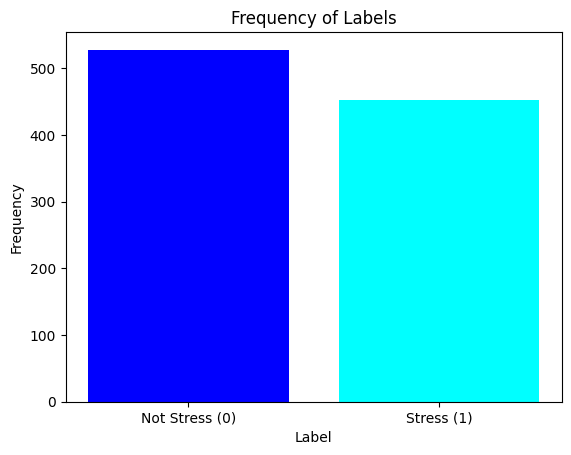

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Count the frequency of each label
unique, counts = np.unique(y, return_counts=True)

#Create bar plot
plt.bar(unique, counts, color=['blue', 'cyan'])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Labels')
plt.xticks(unique, ['Not Stress (0)', 'Stress (1)'])
plt.show()


## **Downloading Datasets**

In [ ]:
!pip install pillow


In [ ]:
import os
import numpy as np
from PIL import Image

# Define the folder names
stress_folder = 'stress'
not_stress_folder = 'not_stress'

# Create folders if they don't exist
os.makedirs(stress_folder, exist_ok=True)
os.makedirs(not_stress_folder, exist_ok=True)

for i in range(0, 981):
    # Determine the folder based on the label
    folder_name = stress_folder if y[i] == 1 else not_stress_folder

    # Define the image file path
    image_path = f"{folder_name}/image_{i}.jpg"

    try:
        # Convert numpy array to image
        image = Image.fromarray((x[i] * 255).astype(np.uint8))

        # Save the image to the appropriate folder
        image.save(image_path)

        print(f"Saved image {i} to {folder_name} folder.")

    except Exception as e:
        print(f"Error saving image {i}: {e}")


Saved image 0 to stress folder.
Saved image 1 to stress folder.
Saved image 2 to stress folder.
Saved image 3 to stress folder.
Saved image 4 to stress folder.
Saved image 5 to stress folder.
Saved image 6 to stress folder.
Saved image 7 to stress folder.
Saved image 8 to stress folder.
Saved image 9 to stress folder.
Saved image 10 to stress folder.
Saved image 11 to stress folder.
Saved image 12 to stress folder.
Saved image 13 to stress folder.
Saved image 14 to stress folder.
Saved image 15 to stress folder.
Saved image 16 to not_stress folder.
Saved image 17 to stress folder.
Saved image 18 to stress folder.
Saved image 19 to stress folder.
Saved image 20 to not_stress folder.
Saved image 21 to stress folder.
Saved image 22 to stress folder.
Saved image 23 to stress folder.
Saved image 24 to stress folder.
Saved image 25 to stress folder.
Saved image 26 to stress folder.
Saved image 27 to stress folder.
Saved image 28 to stress folder.
Saved image 29 to stress folder.
Saved image 

In [ ]:
!zip -r stress.zip stress/
!zip -r not_stress.zip not_stress/

  adding: stress/ (stored 0%)
  adding: stress/image_360.jpg (stored 0%)
  adding: stress/image_667.jpg (stored 0%)
  adding: stress/image_543.jpg (stored 0%)
  adding: stress/image_47.jpg (stored 0%)
  adding: stress/image_415.jpg (stored 0%)
  adding: stress/image_348.jpg (stored 0%)
  adding: stress/image_28.jpg (stored 0%)
  adding: stress/image_615.jpg (stored 0%)
  adding: stress/image_725.jpg (stored 0%)
  adding: stress/image_599.jpg (stored 0%)
  adding: stress/image_208.jpg (stored 0%)
  adding: stress/image_118.jpg (stored 0%)
  adding: stress/image_152.jpg (stored 0%)
  adding: stress/image_721.jpg (stored 0%)
  adding: stress/image_18.jpg (stored 0%)
  adding: stress/image_105.jpg (stored 0%)
  adding: stress/image_685.jpg (stored 0%)
  adding: stress/image_671.jpg (stored 0%)
  adding: stress/image_759.jpg (stored 0%)
  adding: stress/image_21.jpg (stored 0%)
  adding: stress/image_892.jpg (stored 0%)
  adding: stress/image_692.jpg (stored 0%)
  adding: stress/image_151.j

In [ ]:

# Download dataset
from google.colab import files
files.download('stress.zip')
files.download('not_stress.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Phase 3**  

### **Loading Dataset**

In [59]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the zip file
zip_path = "/content/stress+.zip"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")



### **Image Preprocessing**

In [60]:
import cv2
dataset_path = '/content/dataset/stress+'  # Path to extracted dataset

x = []  # To store images
y = []  # To store labels
labels = ['not_stress', 'stress']
label_mapping = {'not_stress': 0, 'stress': 1}  # Mapping labels to numerical values

for label in labels:
    label_path = os.path.join(dataset_path, label)

    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)

        # Read image using OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

        # Resize image to 48x48 pixels (as per your model input shape)
        image = cv2.resize(image, (48, 48))

        # Normalize image
        image = image.astype('float32') / 255.0

        x.append(image)
        y.append(label_mapping[label])  # Append label using label mapping

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


### **Barplot**

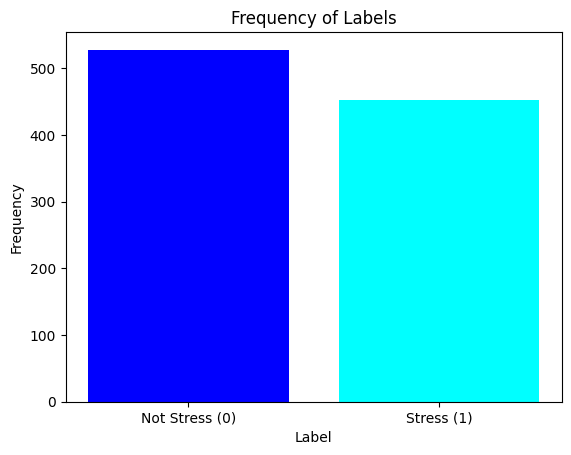

In [61]:
import matplotlib.pyplot as plt
import numpy as np

#Count the frequency of each label
unique, counts = np.unique(y, return_counts=True)

#Create bar plot
plt.bar(unique, counts, color=['blue', 'cyan'])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Labels')
plt.xticks(unique, ['Not Stress (0)', 'Stress (1)'])
plt.show()


### **Test Images for Labelling**

Label: 0


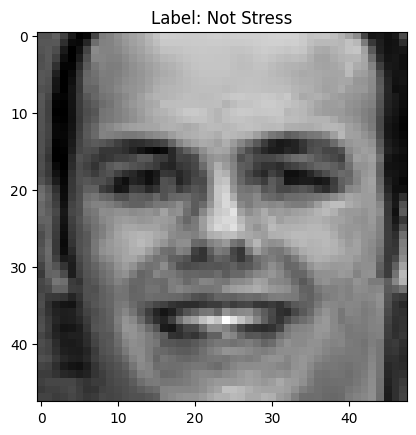

In [62]:
# Display sample image and label
plt.imshow(x[315], cmap='gray')
plt.title('Label: {}'.format('Not Stress' if y[315] == 0 else 'Stress'))
print("Label:", y[315])

Label: 0


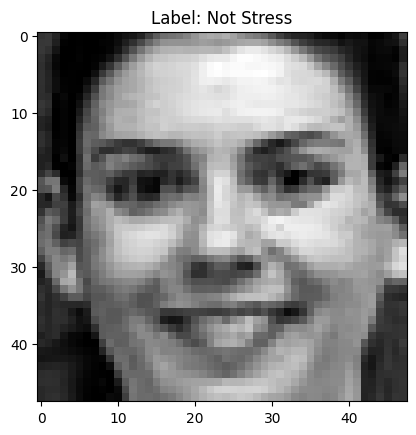

In [63]:
# Display sample image and label
plt.imshow(x[384], cmap='gray')
plt.title('Label: {}'.format('Not Stress' if y[384] == 0 else 'Stress'))
print("Label:", y[384])

Label: 1


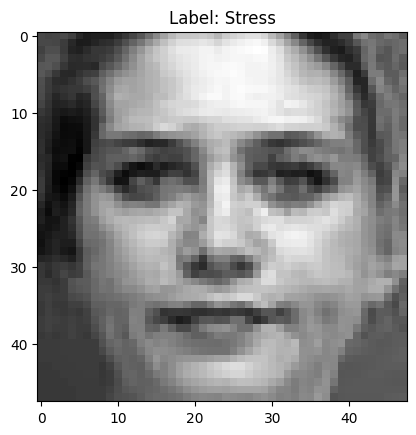

In [64]:
# Display sample image and label
plt.imshow(x[800], cmap='gray')
plt.title('Label: {}'.format('Not Stress' if y[800] == 0 else 'Stress'))
print("Label:", y[800])

Label: 1


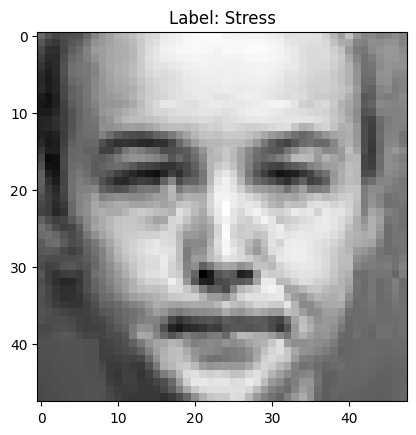

In [65]:
# Display sample image and label
plt.imshow(x[670], cmap='gray')
plt.title('Label: {}'.format('Not Stress' if y[670] == 0 else 'Stress'))
print("Label:", y[670])

Label: 1


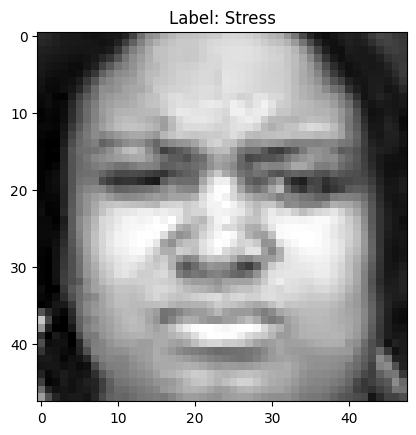

In [67]:
# Display sample image and label
plt.imshow(x[900], cmap='gray')
plt.title('Label: {}'.format('Not Stress' if y[900] == 0 else 'Stress'))
print("Label:", y[900])

### **Separating Training & Test Data**

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Normalizing test and train data
x_train = x_train / 255.0
x_test = x_test / 255.0

### **Model using CNN**

In [77]:
import tensorflow as tf

# Defining model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### **Model Training**

In [82]:
model.fit(x_train, y_train, epochs=120)

Epoch 1/20
25/25 [==============================] - 2s 82ms/step - loss: 0.1666 - accuracy: 0.9311
Epoch 2/20
25/25 [==============================] - 2s 75ms/step - loss: 0.1780 - accuracy: 0.9362
Epoch 3/20
25/25 [==============================] - 2s 83ms/step - loss: 0.1622 - accuracy: 0.9362
Epoch 4/20
25/25 [==============================] - 2s 97ms/step - loss: 0.1548 - accuracy: 0.9362
Epoch 5/20
25/25 [==============================] - 3s 103ms/step - loss: 0.1565 - accuracy: 0.9349
Epoch 6/20
25/25 [==============================] - 2s 74ms/step - loss: 0.1656 - accuracy: 0.9349
Epoch 7/20
25/25 [==============================] - 1s 54ms/step - loss: 0.1590 - accuracy: 0.9349
Epoch 8/20
25/25 [==============================] - 1s 54ms/step - loss: 0.1604 - accuracy: 0.9388
Epoch 9/20
25/25 [==============================] - 1s 51ms/step - loss: 0.1553 - accuracy: 0.9388
Epoch 10/20
25/25 [==============================] - 1s 50ms/step - loss: 0.1521 - accuracy: 0.9426
Epoch 11

### **Model Evaluation**

In [83]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.1858 - accuracy: 0.9442


[0.18578138947486877, 0.9441624283790588]

In [84]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(y_test, predicted_labels)

print(report)


7/7 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       108
           1       0.90      0.99      0.94        89

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



### **Confusion Matrix**

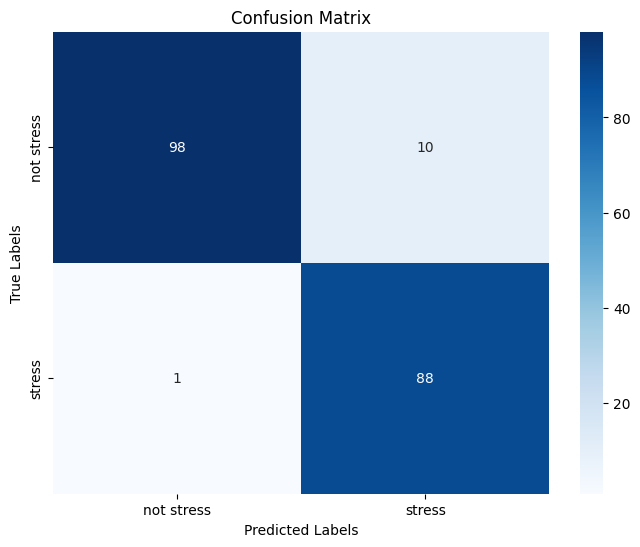

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ["not stress", "stress"]

conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [57]:
#@title Loading Model
"""from tensorflow.keras.models import load_model
model = load_model('/content/my_model_128.h5')"""

"from tensorflow.keras.models import load_model\nmodel = load_model('/content/my_model_128.h5')"

### **Model using MLP**

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Flattening the image data for MLP input
num_samples_train, height, width = x_train.shape
num_samples_test = x_test.shape[0]
X_train_flattened = x_train.reshape(num_samples_train, height * width)
X_test_flattened = x_test.reshape(num_samples_test, height * width)

# Defining MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,2), max_iter=1000, activation='logistic', solver='sgd',learning_rate="adaptive" ,random_state=42)

# Training the classifier
mlp_clf.fit(X_train_flattened, y_train)

# Predictions on the test set
y_pred = mlp_clf.predict(X_test_flattened)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.5482233502538071
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       108
           1       0.00      0.00      0.00        89

    accuracy                           0.55       197
   macro avg       0.27      0.50      0.35       197
weighted avg       0.30      0.55      0.39       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Model using Decision Tress**



In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Flattening the image data for Decision Tree input
num_samples_train, height, width = x_train.shape
num_samples_test = x_test.shape[0]
X_train_flattened = x_train.reshape(num_samples_train, height * width)
X_test_flattened = x_test.reshape(num_samples_test, height * width)

# Defining the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Training the classifier on the training data
tree_clf.fit(X_train_flattened, y_train)

# Making predictions on the test data
y_pred = tree_clf.predict(X_test_flattened)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.883248730964467
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       108
           1       0.88      0.87      0.87        89

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



### Model using Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Flattening the image data for Naive Bayes input
num_samples_train, height, width = x_train.shape
num_samples_test = x_test.shape[0]
X_train_flattened = x_train.reshape(num_samples_train, height * width)
X_test_flattened = x_test.reshape(num_samples_test, height * width)


# Define the prior probabilities based on the class distribution in the training set
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)

# Defining the Naive Bayes classifier
naive_bayes = GaussianNB(priors=class_priors)


# Training the classifier on the training data
naive_bayes.fit(X_train_flattened, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_flattened)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.6345177664974619
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       108
           1       0.59      0.62      0.60        89

    accuracy                           0.63       197
   macro avg       0.63      0.63      0.63       197
weighted avg       0.64      0.63      0.64       197



### Model using Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flattening the image data for logistic regression input
num_samples_train, height, width = x_train.shape
num_samples_test = x_test.shape[0]
X_train_flattened = x_train.reshape(num_samples_train, height * width)
X_test_flattened = x_test.reshape(num_samples_test, height * width)

# Defining logistic regression classifier
logistic_clf = LogisticRegression()

# Training the classifier
logistic_clf.fit(X_train_flattened, y_train)

# Predictions on the test set
y_pred = logistic_clf.predict(X_test_flattened)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.5482233502538071
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       108
           1       0.00      0.00      0.00        89

    accuracy                           0.55       197
   macro avg       0.27      0.50      0.35       197
weighted avg       0.30      0.55      0.39       197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Model using Random Forest**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Flattening the image data for Random Forest input
num_samples_train, height, width = x_train.shape
num_samples_test = x_test.shape[0]
X_train_flattened = x_train.reshape(num_samples_train, height * width)
X_test_flattened = x_test.reshape(num_samples_test, height * width)

# Defining Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_clf.fit(X_train_flattened, y_train)

# Predictions on the test set
y_pred = rf_clf.predict(X_test_flattened)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9746192893401016
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.98      0.97      0.97        89

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [95]:
from joblib import dump

dump(rf_clf, '/content/random_forest_model.joblib')

['/content/random_forest_model.joblib']